# Plot Decision Regions - 2 Dimension, i.e. 2 feature columns
ref: [sklearn example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

ref: [python-machine-learning-book, S. Raschka](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch03/ch03.ipynb)

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [5]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

### Example of using `plot_decision_regions` with 2 dimension data, i.e. 2 feature columns

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


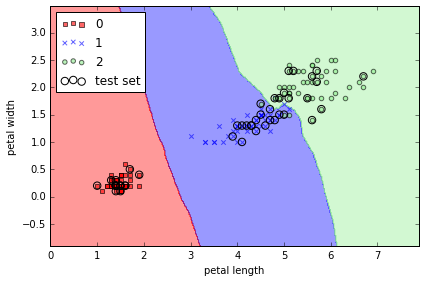

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# read data into df
df = pd.read_csv("./data/iris-with-header.tsv", sep='\t')

# read features into X, labels into y
X = df.iloc[:, 2:4].values #X = features from column 2 to 3
y = df.iloc[:, -1].values #y = label

# convert text-based label to numerical label
class_le = LabelEncoder()
y = class_le.fit_transform(y) # y can now be used as labels
print(class_le.classes_)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# train a knn
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto', metric='minkowski', p=2, weights='uniform')
iris_knn = knn.fit(X_train, y_train) # iris_knn is the model/classifier

# prepare for plotting
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# plot
plot_decision_regions(X=X_combined, y=y_combined, classifier=iris_knn, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()